In [61]:
# Load Pakages Mathematical and DATA Operations
import numpy as np 
import pandas as pd 

# Load Pakages plotting
import matplotlib.pyplot as plt 
import seaborn as sns 

# Importing STYLE to set the Style
from matplotlib import style

# Load Pakages for Ignore Warnings
import warnings
warnings.filterwarnings('ignore')
sns.set()
from collections import Counter

# Load Pakages Scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Load Pakages for Encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# Load Pakage COLUMNTRANSFORMER to apply transformers to columns of an array. 
from sklearn.compose import ColumnTransformer

# Load Pakages for Data Partetions
from sklearn.model_selection import train_test_split

# Importing Pipes for making the Pipe Flow
from sklearn.pipeline import Pipeline

# Load Pakages for Model Building
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

# Load Pakages for Evaluation
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import GridSearchCV

# Importing WIDGETS to Build a WIDGETS
import ipywidgets as widgets

# Importing the DISPLAY Function to Display the widgets
from IPython.display import display

In [62]:
# Load Dataset
data = pd.read_csv("insurance.csv")

#  Exploratory Data Analysis

In [63]:
# Displaying the First 5-Records of data
data.head(5)

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [64]:
# Displaying the Last 5-Records of data
data.tail(5)

,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [65]:
# Displaying the Random 5-Records of data
data.sample(5)

,age,sex,bmi,children,smoker,region,expenses
136,19,male,34.1,0,no,southwest,1261.44
978,45,female,40.0,3,no,northeast,9704.67
480,63,male,41.3,3,no,northwest,15555.19
229,47,male,25.5,2,no,northeast,9225.26
968,21,male,25.7,2,no,northeast,3279.87


In [66]:
print(f'-> No. of Rows: {data.shape[0]} \n-> No. of Columns: {data.shape[1]}')

-> No. of Rows: 1338 
-> No. of Columns: 7


In [67]:
# Information of Data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [68]:
Numerical_Features = [i for i in data.dtypes[data.dtypes != 'object'].index]
Categorical_Features = [i for i in data.dtypes[data.dtypes == 'object'].index]
print(f'Numerical Features: {Numerical_Features} \nCategorical Features: {Categorical_Features}')

Numerical Features: ['age', 'bmi', 'children', 'expenses'] 
Categorical Features: ['sex', 'smoker', 'region']


In [69]:
print(f'No. of Numerical Features: {len(Numerical_Features)} \nNo. of Categorical Features: {len(Categorical_Features)}')

No. of Numerical Features: 4 
No. of Categorical Features: 3


In [70]:
# Statistical Summary
data[Numerical_Features].describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [71]:
data[Categorical_Features].describe()

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [72]:
# check unique values
for i in data.columns:
  print('*************************************',i,'*************************************')
  print(data[i].unique())
  print()

************************************* age *************************************
[19 18 28 33 32 31 46 37 60 25 62 23 56 27 52 30 34 59 63 55 22 26 35 24
 41 38 36 21 48 40 58 53 43 64 20 61 44 57 29 45 54 49 47 51 42 50 39]

************************************* sex *************************************
['female' 'male']

************************************* bmi *************************************
[27.9 33.8 33.  22.7 28.9 25.7 33.4 27.7 29.8 25.8 26.2 26.3 34.4 39.8
 42.1 24.6 30.8 23.8 40.3 35.3 36.  32.4 34.1 31.9 28.  23.1 32.8 17.4
 36.3 35.6 28.6 28.3 36.4 20.4 20.8 36.7 39.9 26.6 36.6 21.8 37.1 37.3
 38.7 34.8 24.5 35.2 33.6 28.7 37.  31.8 31.7 22.9 27.4 33.7 24.7 25.9
 22.4 39.1 36.2 24.  24.8 28.5 28.1 32.  34.  29.6 35.5 26.9 38.3 37.6
 41.2 31.2 27.2 27.  39.5 31.3 20.  19.3 31.6 25.5 30.1 29.9 27.5 28.4
 30.9 35.1 29.7 35.7 32.2 49.1 23.4 29.  31.4 33.9 28.8 37.4 17.8 34.7
 26.5 22.  35.9 25.6 25.2 32.5 25.3 38.8 30.5 37.7 24.1 24.4 27.8 36.9
 39.6 28.2 33.2 18.9 41.5 30

In [73]:
# Checking for unique values in every column
data.nunique()

age           47
sex            2
bmi          275
children       6
smoker         2
region         4
expenses    1337
dtype: int64

In [74]:
#Checking the null values 
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [75]:
# Getting the total sum of null values
data.isnull().sum().sum()

0

In [76]:
# Listing the type of all columns 
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
expenses    float64
dtype: object

# Detecting the outliers

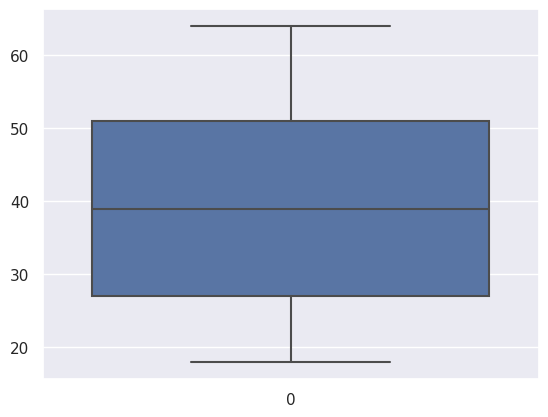

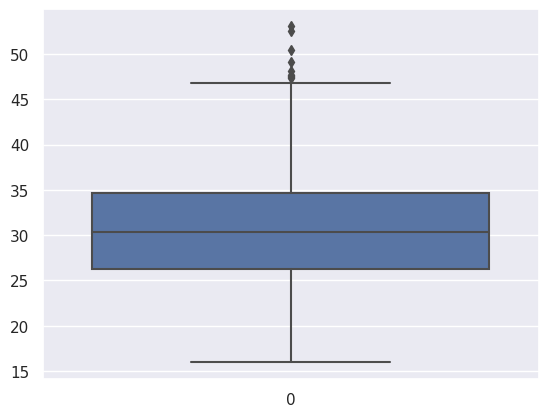

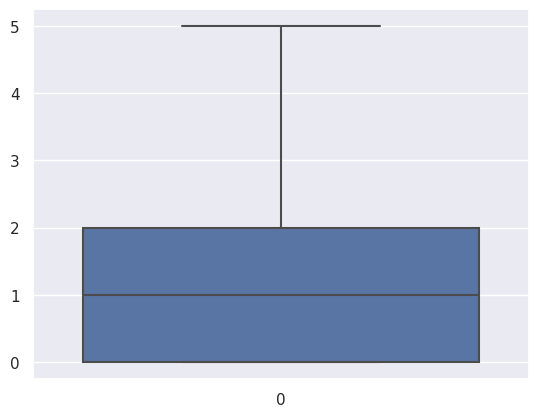

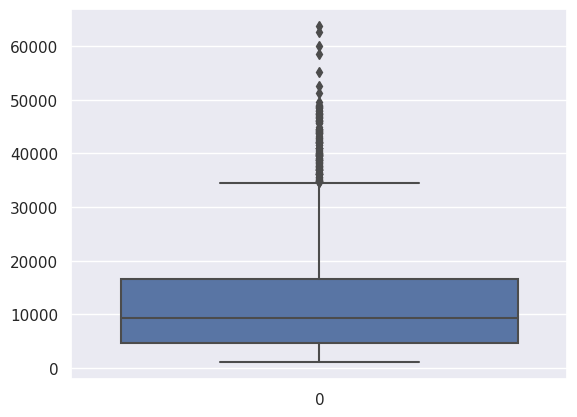

In [77]:
# Function for Boxplot
def Boxplot(dataset):
  for i in dataset.dtypes[dataset.dtypes != 'object'].index:
    sns.boxplot(dataset[i])
    plt.show();

Boxplot(data)

In [78]:
# Function for Detecting the outliers
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
# print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code
sample_outliers = detect_outliers_iqr(data['bmi'])
print("Outliers from IQR method: ", sample_outliers)

Outliers from IQR method:  [47.4, 47.5, 47.6, 47.7, 48.1, 49.1, 50.4, 52.6, 53.1]


In [79]:
# no. of Labels of Categorical Variable
for i in Categorical_Features:
  print(f'***********{i}*********** \n{data[i].value_counts()}')

***********sex*********** 
male      676
female    662
Name: sex, dtype: int64
***********smoker*********** 
no     1064
yes     274
Name: smoker, dtype: int64
***********region*********** 
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


In [80]:
# checking Duplicated values
Before_shape = data.shape
Duplicate = data.duplicated().sum()
data = data.drop_duplicates()
after_shape = data.shape
print(f'Orginal Shape: {Before_shape} \nNo. of Duplicates: {Duplicate}\nAfter Droping Duplicate: {after_shape}')

Orginal Shape: (1338, 7) 
No. of Duplicates: 1
After Droping Duplicate: (1337, 7)


# Data Visualization

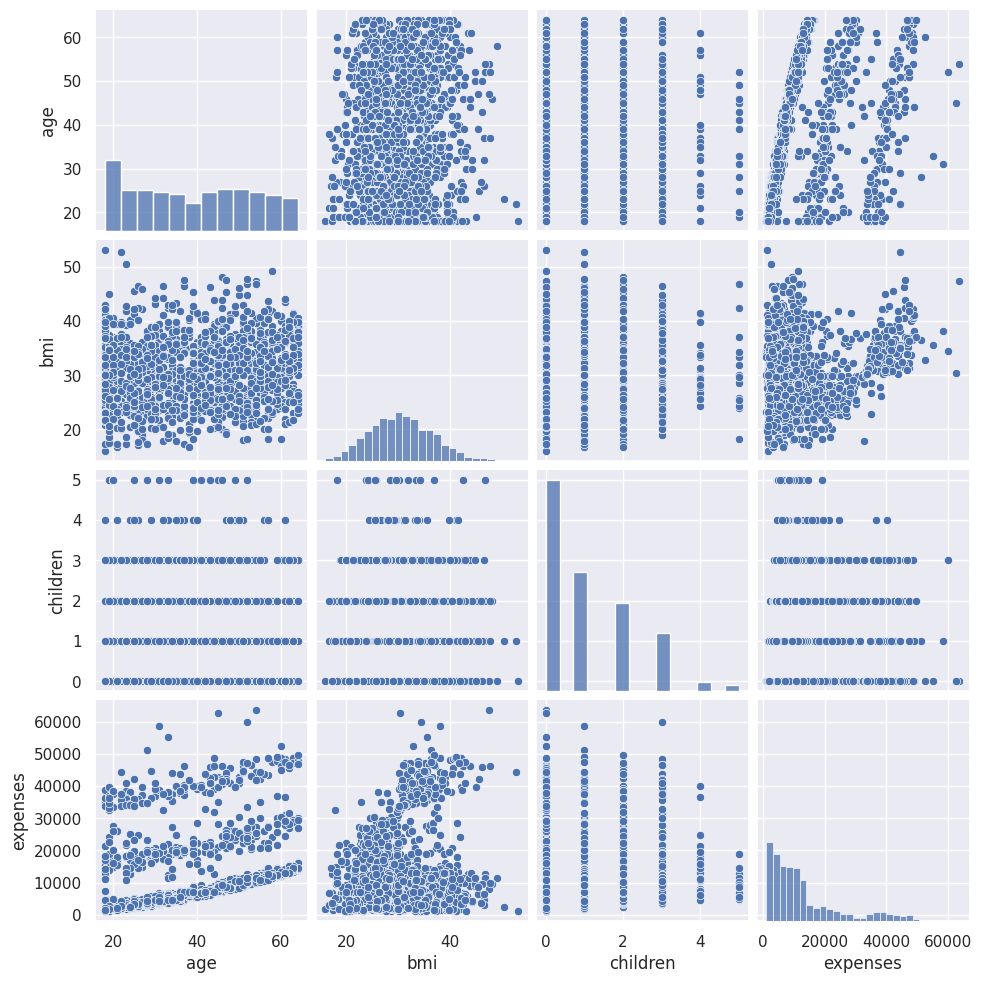

In [81]:
sns.pairplot(data)

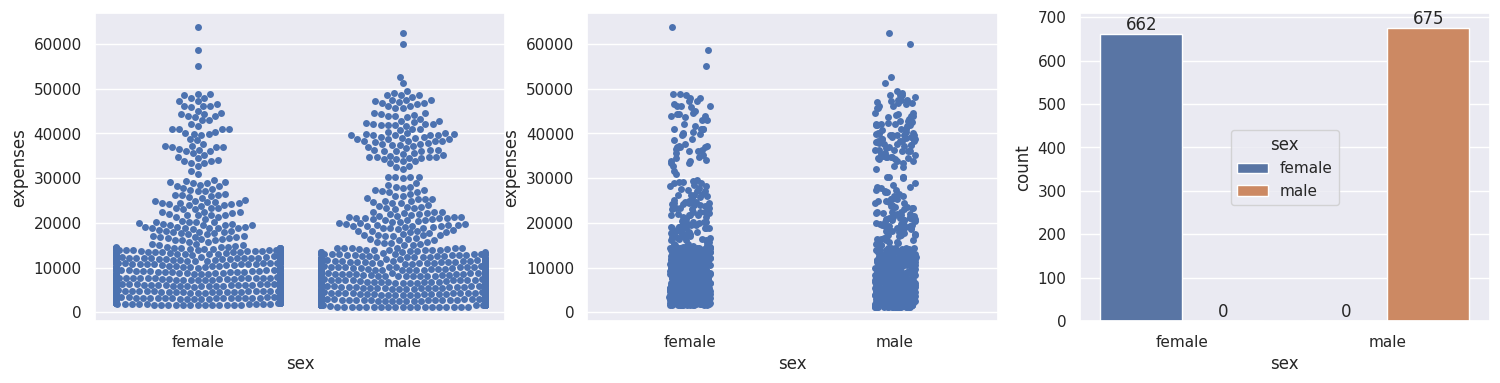

In [82]:
fig, ax = plt.subplots(1,3,figsize=(18,4))
sns.swarmplot(ax=ax[0],x='sex',y='expenses',data=data,)
sns.stripplot(ax=ax[1],x='sex',y='expenses',data=data)
sns.countplot(ax=ax[2],x='sex',hue='sex',data=data)
ax[2].bar_label(ax[2].containers[0])
ax[2].bar_label(ax[2].containers[1])
plt.legend(loc='center',title='sex')

## It shows that count is almost equal not much difference

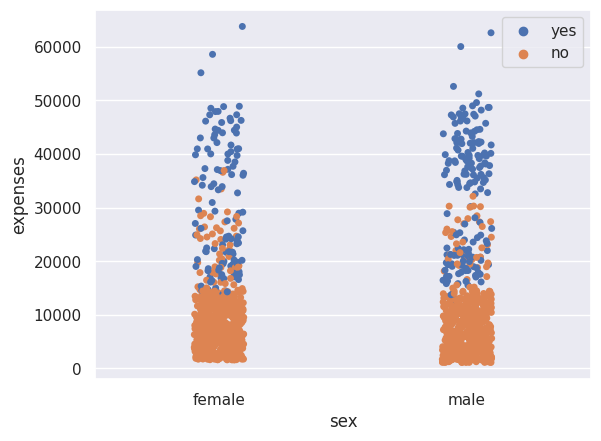

In [83]:
# Gender vs Smoker
sns.stripplot(x = 'sex',y = 'expenses',data = data,hue='smoker')
plt.legend(loc = 'best')

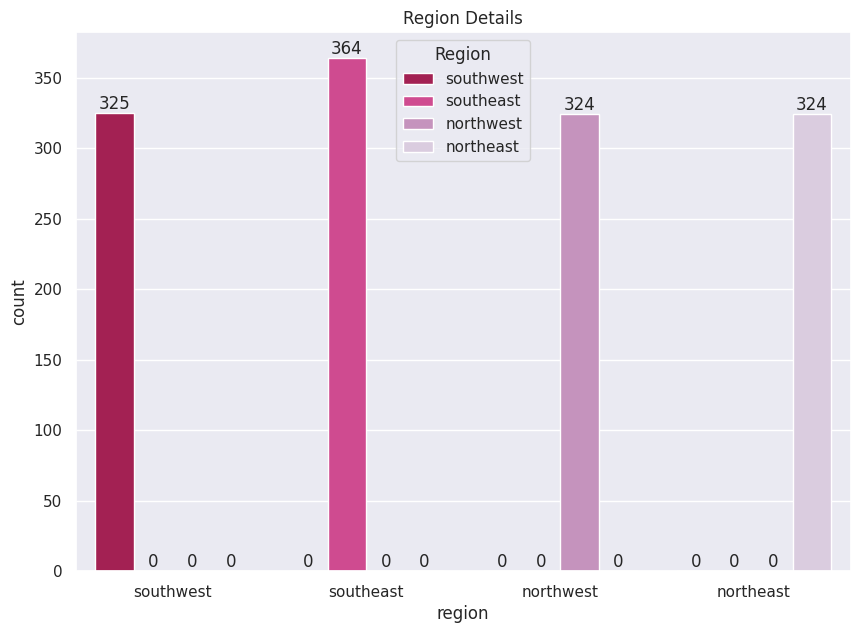

In [84]:
# Region Column
plt.figure(figsize=(10,7))
ax = sns.countplot(x='region',data= data,hue='region',palette='PuRd_r')
for container in ax.containers:
    ax.bar_label(container)
plt.title("Region Details")
plt.legend(loc='upper center',title='Region')
plt.show()

## This shows we have four regions in that data is nearly normally distrubeted that one region is slightly high tha is SE

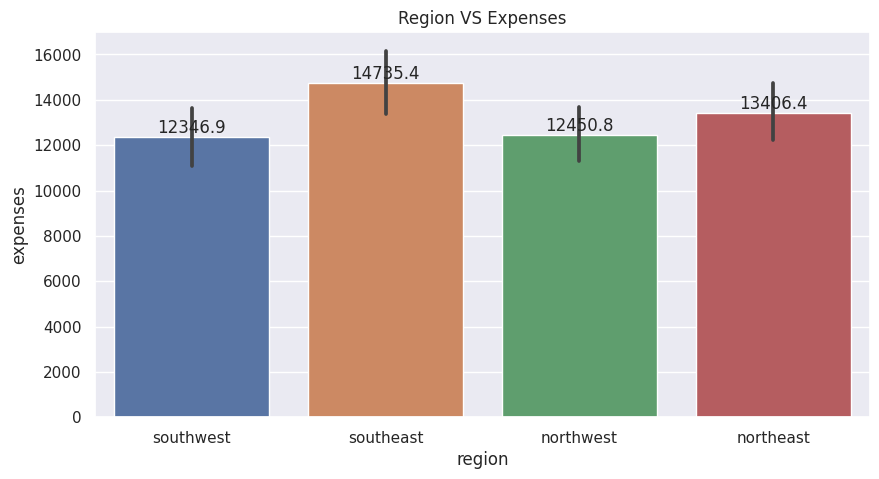

In [85]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x='region',y='expenses',data = data)
ax.bar_label(ax.containers[0])
plt.title('Region VS Expenses')
plt.show()

## From this we get that SE region people have highest expense than others in this case get to know about is that region can also affect the expenses.

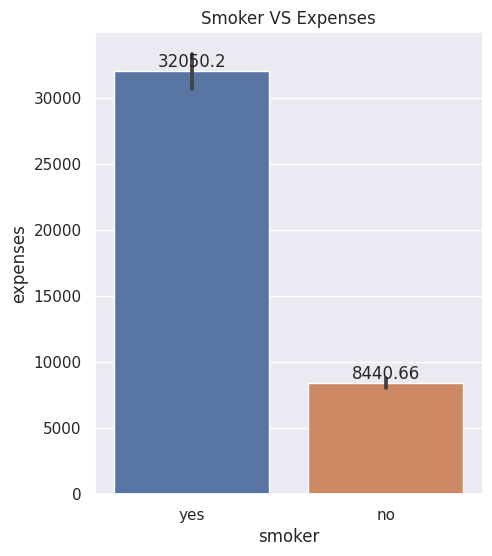

In [86]:
plt.figure(figsize=(5,6))
ax = sns.barplot(x='smoker',y='expenses',data = data)
ax.bar_label(ax.containers[0])
plt.title('Smoker VS Expenses')
plt.show()

## This shows that person who smokes that their expense higher.

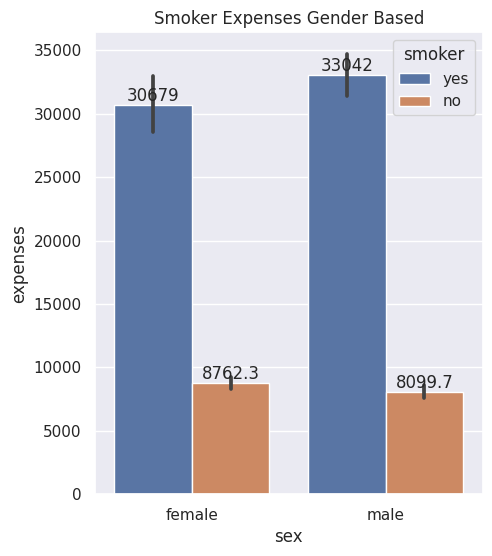

In [87]:
plt.figure(figsize=(5,6))
ax = sns.barplot(x='sex',y='expenses',hue='smoker',data = data)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Smoker Expenses Gender Based')
plt.show()

## This plot shows that smoker male has higher expense then female.

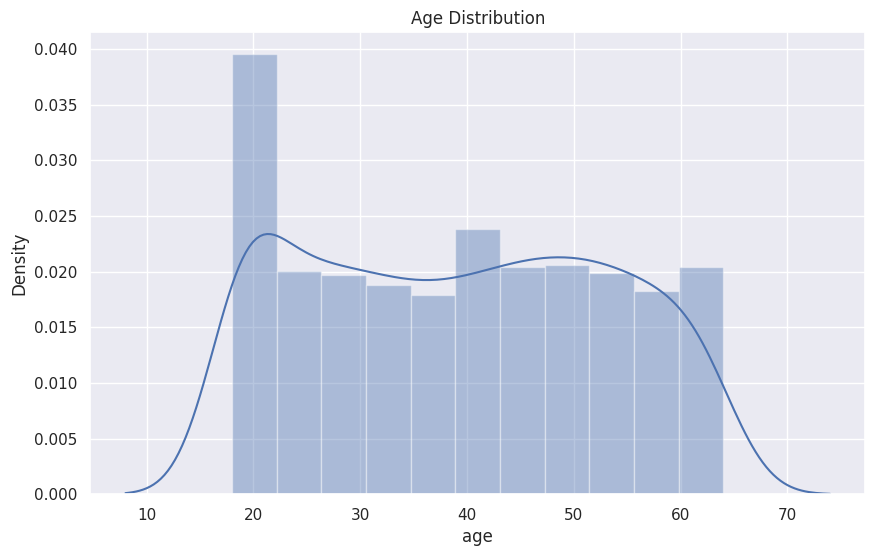

In [88]:
# Distribution of Age Value

sns.set()
plt.figure(figsize=(10,6))
sns.distplot(data['age'])
plt.title('Age Distribution')
plt.show()

## Now we See the Distribution the age value is 10 to 70 we have more density in the age of 20 & 21 other than that the age is distributed normally

## It shows more no of people in our dataset is 20 & 21 age

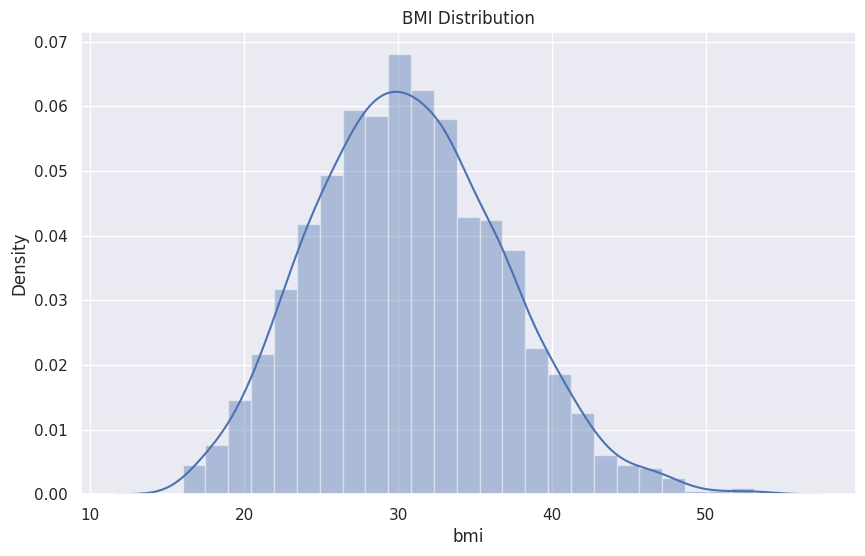

In [89]:
# Distribution of BMI Value

sns.set()
plt.figure(figsize=(10,6))
sns.distplot(data['bmi'])
plt.title('BMI Distribution')
plt.show()

## It shows that BMI is nearly normally distributed,But normal BMI range for a person is 18.5 to 24.9,it shows the lot people are over weight it can affect a insurance cost

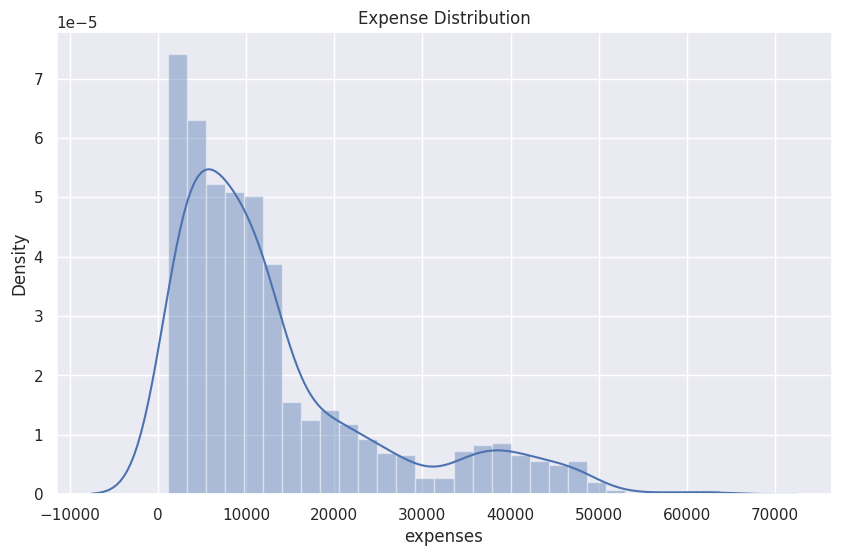

In [90]:
# Distribution of Expenses Value

sns.set()
plt.figure(figsize=(10,6))
sns.distplot(data['expenses'])
plt.title('Expense Distribution')
plt.show()

## This Distribution shows us that data is not normally distributed but we have more values in lower expenses that gives cost is not so to high

<Axes: >

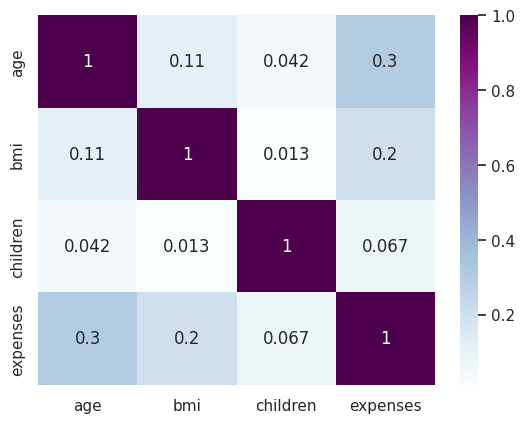

In [91]:
sns.heatmap(data.corr(),annot=True,cmap = 'BuPu')

# Preprocessing

In [92]:
# Creating a function
def preprocess_inputs(df):
    df = df.copy()

    # Split df into X and Y
    y = df['expenses']
    x = df.drop('expenses', axis=1)

    # Train-test split
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=.7, shuffle = True, random_state=101)

    return x_train, x_test, y_train, y_test

In [93]:
x_train, x_test, y_train, y_test = preprocess_inputs(data)

In [94]:
x_train.head()

,age,sex,bmi,children,smoker,region
405,52,female,38.4,2,no,northeast
836,36,male,31.5,0,no,southwest
483,51,female,39.5,1,no,southwest
319,32,male,37.3,1,no,northeast
957,24,male,26.8,1,no,northwest


In [95]:
y_train.head()

405    11396.90
836     4402.23
483     9880.07
319     4667.61
957    12609.89
Name: expenses, dtype: float64

# Building a Pipeline & Training

In [96]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

In [97]:
# Pipeline Concentrate in categorical columns and scale the data
# Assigning the categorical columns
nominal_features = ['sex', 'smoker', 'region']

# It will transforms the categorical value and skip the binary values
nominal_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse = False, drop = 'if_binary'))
])

# Preprorcessor Tells the model which value to be target
# Passthrough will pass a binary columns it won't drop it
preprocessor = ColumnTransformer(transformers=[
    ('nominal', nominal_transformer, nominal_features)
], remainder='passthrough')

# Building a model by Scaler & pipeline
LR_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

KNN_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),
    ('regressor', KNeighborsRegressor())
])

RF_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),
    ('regressor', RandomForestRegressor())
])

GB_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),
    ('regressor', GradientBoostingRegressor())
])

In [ ]:
#Linear Regression

In [118]:
LR_model.fit(x_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('nominal',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 sparse=False))]),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('scaler', StandardScaler()),
                ('regressor', LinearRegression())])

In [119]:
y_pred_LR = LR_model.predict(x_test)

In [120]:
# MEAN SQUARED ERROR
y_pred_LR_m = np.mean((y_test - y_pred_LR)**2)
y_pred_LR_m

34965592.59396053

In [121]:
# RMSE 
np.sqrt(y_pred_LR_m)

5913.171111506967

In [106]:
#r2=1-(rss/tss)
#RSS = sum of squared residuals
#TSS = total sum of squares

In [122]:
# Sum of the squared error for baseline model
TSS = np.sum((y_test - y_test.mean())**2)
TSS

56334917560.88686

In [123]:
# Sum of the squared error for our model
RSS = np.sum((y_test - y_pred_LR)**2)
RSS

14056168222.772133

In [124]:
# R-Squared Error
R2 = 1-(RSS/TSS)
R2

0.7504892377346571

In [125]:
r2_score(y_test, y_pred_LR)

0.7504892377346571

In [98]:
# GradientBoostingRegressor

In [100]:
GB_model.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('nominal',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 sparse=False))]),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('scaler', StandardScaler()),
                ('regressor', GradientBoostingRegressor())])

In [101]:
y_pred_GB = GB_model.predict(x_test)

In [102]:
# MEAN SQUARED ERROR
y_pred_GB_m = np.mean((y_test - y_pred_GB)**2)
y_pred_GB_m

22252950.010966416

In [103]:
# RMSE 
np.sqrt(y_pred_GB_m)

4717.303256201197

In [115]:
# Sum of the squared error for baseline model
TSS = np.sum((y_test - y_test.mean())**2)
TSS

56334917560.88686

In [116]:
# Sum of the squared error for our model
RSS = np.sum((y_test - y_pred_GB)**2)
RSS

8945685904.408499

In [117]:
# R-Squared Error
R2 = 1-(RSS/TSS)
R2

0.8412053076186721

In [113]:
r2_score(y_test, y_pred_GB)

0.8412053076186721

In [ ]:
# KNN

In [126]:
KNN_model.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('nominal',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 sparse=False))]),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('scaler', StandardScaler()),
                ('regressor', KNeighborsRegressor())])

In [127]:
y_pred_KNN = KNN_model.predict(x_test)

In [130]:
# MEAN
y_pred_KNN_m = np.mean((y_test - y_pred_KNN)**2)
y_pred_KNN_m

32062335.073065326

In [131]:
# RMSE
np.sqrt(y_pred_KNN_m)

5662.361263030232

In [136]:
# Sum of the squared error for baseline model
TSS = np.sum((y_test - y_test.mean())**2)
TSS

56334917560.88686

In [139]:
# Sum of the squared error for our model
RSS = np.sum((y_test - y_pred_KNN)**2)
RSS

12889058699.372261

In [140]:
# R-Squared Error
R2 = 1-(RSS/TSS)
R2

0.7712065756474793

In [141]:
r2_score(y_test, y_pred_KNN)

0.7712065756474793

In [142]:
# Random Forest
RF_model.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('nominal',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 sparse=False))]),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('scaler', StandardScaler()),
                ('regressor', RandomForestRegressor())])

In [143]:
y_pred_RF = RF_model.predict(x_test)

In [144]:
# MEAN
y_pred_RF_m = np.mean((y_test - y_pred_RF)**2)
y_pred_RF_m

23992696.53288437

In [145]:
# RMSE
np.sqrt(y_pred_RF_m)

4898.234021857711

In [146]:
# Sum of the squared error for baseline model
TSS = np.sum((y_test - y_test.mean())**2)
TSS

56334917560.88686

In [147]:
# Sum of the squared error for our model
RSS = np.sum((y_test - y_pred_RF)**2)
RSS

9645064006.219517

In [148]:
# R-Squared Error
R2 = 1-(RSS/TSS)
R2

0.8287906608579818

In [149]:
r2_score(y_test,y_pred_RF)

0.8287906608579818

In [150]:
models = [('LR', np.sqrt(y_pred_LR_m), r2_score(y_test, y_pred_LR)),
          ('KNN', np.sqrt(y_pred_KNN_m), r2_score(y_test, y_pred_KNN)),
          ('RF', np.sqrt(y_pred_RF_m), r2_score(y_test, y_pred_RF)),
          ('GB', np.sqrt(y_pred_GB_m), r2_score(y_test, y_pred_GB)) 
         ]

In [151]:
predict = pd.DataFrame(data = models, columns=['Model', 'RMSE', 'R2_Score'])
predict

,Model,RMSE,R2_Score
0,LR,5913.171112,0.750489
1,KNN,5662.361263,0.771207
2,RF,4898.234022,0.828791
3,GB,4717.303256,0.841205


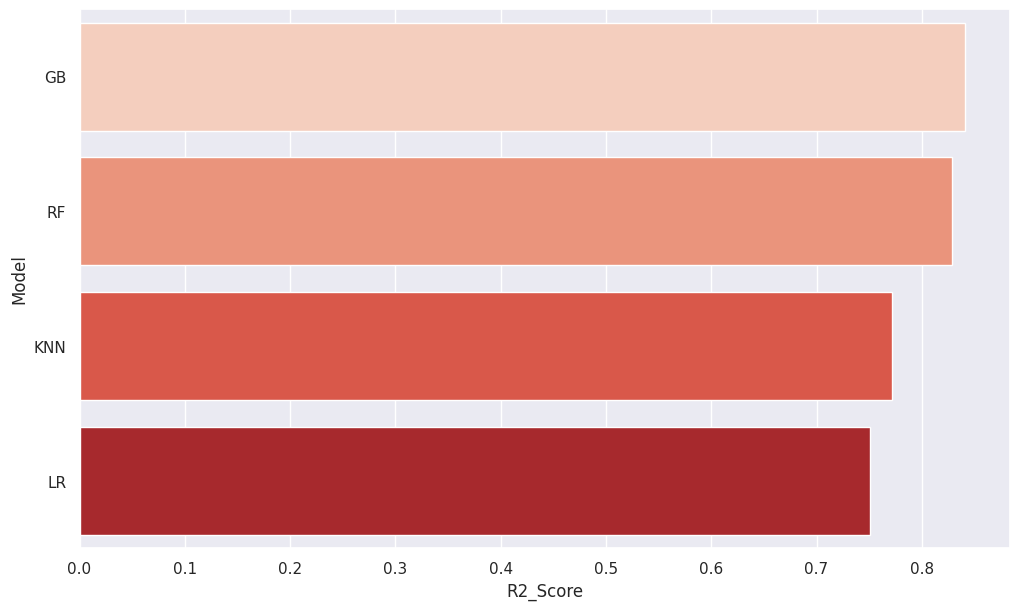

In [152]:
plt.figure(figsize=(12,7))
predict.sort_values(by=['R2_Score'], ascending=False, inplace=True)

sns.barplot(x='R2_Score', y='Model',data = predict, palette='Reds')
plt.xlabel('R2_Score')
plt.ylabel('Model')
plt.show()

## From all the model GradientBoostingRegressor performs well

In [153]:
y = data['expenses']
x = data.drop('expenses', axis=1)

In [154]:
GB_model.fit(x, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('nominal',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 sparse=False))]),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('scaler', StandardScaler()),
                ('regressor', GradientBoostingRegressor())])

In [155]:
import joblib

In [156]:
joblib.dump(GB_model,'model_jobliob_gr')

['model_jobliob_gr']

In [157]:
model = joblib.load('model_jobliob_gr')
model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('nominal',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 sparse=False))]),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('scaler', StandardScaler()),
                ('regressor', GradientBoostingRegressor())])

In [158]:
data = {'age':40,'sex':'male','bmi':40.30,'children':4,'smoker':'yes','region':'southwest'}
df = pd.DataFrame(data,index = [0])
df

,age,sex,bmi,children,smoker,region
0,40,male,40.3,4,yes,southwest


In [159]:
model.predict(df)

array([41881.471169])

# INTERACTIVE WIDGETS

In [160]:
x_train 

,age,sex,bmi,children,smoker,region
405,52,female,38.4,2,no,northeast
836,36,male,31.5,0,no,southwest
483,51,female,39.5,1,no,southwest
319,32,male,37.3,1,no,northeast
957,24,male,26.8,1,no,northwest
...,...,...,...,...,...,...
575,58,female,27.2,0,no,northwest
974,26,male,35.4,0,no,southeast
75,57,male,34.0,0,no,northwest
600,18,female,39.2,0,no,southeast


In [161]:
{column : list(x_train[column].unique()) for column in x_train.select_dtypes('object').columns}

{'sex': ['female', 'male'],
 'smoker': ['no', 'yes'],
 'region': ['northeast', 'southwest', 'northwest', 'southeast']}

In [162]:
x_train.describe()

,age,bmi,children
count,935.000000,935.000000,935.000000
mean,39.180749,30.619679,1.100535
std,14.027140,6.178380,1.191759
min,18.000000,16.800000,0.000000
25%,27.000000,25.950000,0.000000
50%,39.000000,30.200000,1.000000
75%,51.000000,34.650000,2.000000
max,64.000000,53.100000,5.000000


In [163]:
widgets.IntSlider()

IntSlider(value=0)

In [164]:
widgets.FloatSlider()

FloatSlider(value=0.0)

In [165]:
widgets.ToggleButtons()

ToggleButtons(options=(), value=None)

In [167]:
widgets.IntSlider(
    value = 18,
    min = 10,
    max = 60,
    step = 1,
    description = 'AGE:'
)

IntSlider(value=18, description='AGE:', max=60, min=10)

In [168]:
widgets.FloatSlider(
    value = 30,
    min = 15,
    max = 54,
    step = 0.01,
    description = 'BMI: ' 
)

FloatSlider(value=30.0, description='BMI: ', max=54.0, min=15.0, step=0.01)

In [169]:
widgets.IntSlider(
    value = 1,
    min = 0,
    max = 10,
    step = 1,
    description ="CHILDREN'S:" 
)

IntSlider(value=1, description="CHILDREN'S:", max=10)

In [170]:
widgets.ToggleButtons(
    options = ['female','male'],
    description = 'SEX: '
)

ToggleButtons(description='SEX: ', options=('female', 'male'), value='female')

In [171]:
widgets.ToggleButtons(
    options = ['no','yes'],
    description = 'SMOKER: '
)

ToggleButtons(description='SMOKER: ', options=('no', 'yes'), value='no')

In [172]:
widgets.Dropdown(
    options = ['northwest', 'southwest', 'northeast', 'southeast'],
    description = 'REGION: '
)

Dropdown(description='REGION: ', options=('northwest', 'southwest', 'northeast', 'southeast'), value='northwes…

In [173]:
Age_widget = widgets.IntSlider(
    value = 18,
    min = 10,
    max = 60,
    step = 1,
    description = 'AGE:'
)

Bmi_widget = widgets.FloatSlider(
    value = 30,
    min = 15,
    max = 54,
    step = 0.01,
    description = 'BMI: ' 
)


Childrens_widget = widgets.IntSlider(
    value = 1,
    min = 0,
    max = 10,
    step = 1,
    description ="CHILDREN'S:" 
)


Sex_widget = widgets.ToggleButtons(
    options = ['female','male'],
    description = 'SEX: '
)


Smoker_widget = widgets.ToggleButtons(
    options = ['no','yes'],
    description = 'SMOKER: '
)


Region_widget = widgets.Dropdown(
    options = ['northwest', 'southwest', 'northeast', 'southeast'],
    description = 'REGION: '
)



widgets.Button(
    description = 'Predict'
)

Button_widget = widgets.Button(
    description = 'Predict'
)

prediction_out = widgets.Output()


def make_prediction(btn):
  x = pd.DataFrame({
      'age':      Age_widget.value,
      'sex':      Sex_widget.value,
      'bmi':      Bmi_widget.value,
      'children': Childrens_widget.value,
      'smoker':   Smoker_widget.value,
      'region':   Region_widget.value
  },index = [0])

  prediction = GB_model.predict(x)

  with prediction_out:
    prediction_out.clear_output()
    print('Your Insurance Premium Per Year is Rs:',format(prediction[0]))



Button_widget.on_click(make_prediction)

In [174]:
display(Age_widget,Bmi_widget,Childrens_widget, Sex_widget, Smoker_widget, Region_widget, Button_widget, prediction_out)

IntSlider(value=18, description='AGE:', max=60, min=10)

FloatSlider(value=30.0, description='BMI: ', max=54.0, min=15.0, step=0.01)

IntSlider(value=1, description="CHILDREN'S:", max=10)

ToggleButtons(description='SEX: ', options=('female', 'male'), value='female')

ToggleButtons(description='SMOKER: ', options=('no', 'yes'), value='no')

Dropdown(description='REGION: ', options=('northwest', 'southwest', 'northeast', 'southeast'), value='northwes…

Button(description='Predict', style=ButtonStyle())

Output()